# The Spark Foundation # Task 1

# Task : Predict the % of Score based on the number of study hours.

### Prediction using Supervised ML Algorithm
### Simple Linear Regression with Python Scikit Learn Library

## Name : Premalatha S

### Import Libraries

In [35]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load Dataset

In [36]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploratory Data Analysis

In [37]:
# Number of row and column in  the dataset

print(" Number of row in the dataset are :", df.shape[0])
print(" Number of column in the dataset are :", df.shape[1])

 Number of row in the dataset are : 25
 Number of column in the dataset are : 2


In [38]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data Visualization

<IPython.core.display.Javascript object>

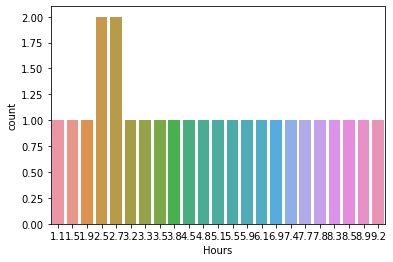

In [40]:
sns.countplot("Hours", data=df)
plt.show()

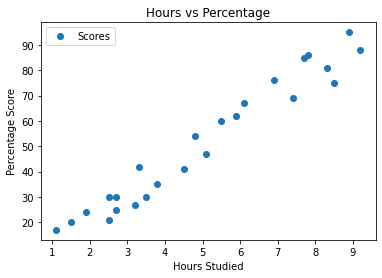

In [41]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the above graph we can see, there is a linear relationship between x and y 
#### Hours of studied and % of score having positive linear relationship.

### Preparing the data

In [42]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the Algorithm

In [44]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression()

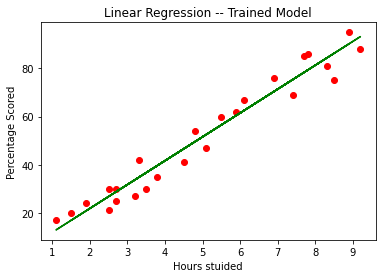

In [45]:
# Plotting the regression line (y=mx+b)
line = regressor.coef_*X+regressor.intercept_


# Plotting for the test data
plt.title("Linear Regression -- Trained Model")
plt.xlabel("Hours stuided")
plt.ylabel("Percentage Scored")
plt.scatter(X, y, color="Red")
plt.plot(X, line, color='Green');
plt.show()

### Making Predictions

In [46]:
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Comparing Actual and Predicted Data

In [47]:
final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
final

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Accuracy of the model

In [48]:
from sklearn import metrics
res = metrics.r2_score(y_test, y_pred)
print("Accuracy = ", res*100)

Accuracy =  94.54906892105356


### Evaluating the model

In [49]:
from sklearn import metrics  
print('Test Data - Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Test Data - mean sqrd error    : ' + str(np.sqrt(mean_squared_error(y_test,y_pred))))
print('Test Data - r2 score           : ' + str(r2_score(y_test, y_pred )))

Test Data - Mean Absolute Error: 4.183859899002975
Test Data - mean sqrd error    : 4.6474476121003665
Test Data - r2 score           : 0.9454906892105356


### Testing the result with new data

In [50]:
hours = 9.25
own_pred = regressor.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## The % of marks scored by the student who studied for 9.25 hours per day is 93.69 %.

# Thank you!!! 